In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import nltk
import re
import string
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install chart_studio
!pip install scattertext
!python -m spacy download en_core_web_md 

     |████████████████████████████████| 64 kB 1.4 MB/s 
     |████████████████████████████████| 7.3 MB 2.3 MB/s 
     |████████████████████████████████| 24.1 MB 2.5 kB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9310 sha256=ac1ba3b4879cc87abc89ebb2f64cc5eed8a396fbd13023368a530709849000b2
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 96.4 MB 1.2 MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-py3-none-any.whl size=98051302 sha256=1a4c26bd7d0d611def7d4b52af3a10377c006358537cbaf0eeed8a31bda656f9
  Stored in directory: /tmp/pip-ephem-wheel-cache-49kpyy31/wheels/69/c5/b8/4f1c029d89238734311b3269762ab2ee325a42da2ce8edb997
Successfully built en-core-web-

In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'

cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
from collections import Counter
import scattertext as st
import spacy
from pprint import pprint
import en_core_web_sm
nlp = spacy.load('en_core_web_md')
import chart_studio


OSError: ignored

In [ ]:
df1 = pd.read_csv('data1.csv')
df2 = pd.read_csv('data2.csv')
df3 = pd.read_csv('data3.csv')
df4 = pd.read_csv('data4.csv')
df5 = pd.read_csv('data5.csv')
df6 = pd.read_csv('data6.csv')
df7 = pd.read_csv('data7.csv')
df8 = pd.read_csv('data8.csv')
df9 = pd.read_csv('data9.csv')
df10 = pd.read_csv('data10.csv')
df11 = pd.read_csv('data11.csv')
df12 = pd.read_csv('data12.csv')
df13 = pd.read_csv('data13.csv')
df14 = pd.read_csv('data14.csv')
df15 = pd.read_csv('data15.csv')
df16 = pd.read_csv('data16.csv')
df17 = pd.read_csv('data17.csv')

In [ ]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17], axis=0)

In [ ]:
df.head()

0  ...  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
0  0  ...  is upset that he can't update his Facebook by ...                                                                  
1  0  ...  @Kenichan I dived many times for the ball. Man...                                                                  
2  0  ...    my whole body feels itchy and like its on fire                                                                   
3  0  ...  @nationwideclass no, it's not behaving at all....                                                                  
4  0  ...                      @Kwesidei not the whole crew                                                                   

[5 rows x 6 columns]

In [ ]:
df.describe()

0    1467810369
count  1.599999e+06  1.599999e+06
mean   2.000001e+00  1.998818e+09
std    2.000001e+00  1.935757e+08
min    0.000000e+00  1.467811e+09
25%    0.000000e+00  1.956916e+09
50%    4.000000e+00  2.002102e+09
75%    4.000000e+00  2.177059e+09
max    4.000000e+00  2.329206e+09

#1. Cleaning Data

##1.1. Adding Column Names

In [ ]:
df.columns = ['Class', 'Id', 'Date', 'Flag', 'User', 'Tweet'];
df.head()

Class  ...                                              Tweet
0      0  ...  is upset that he can't update his Facebook by ...
1      0  ...  @Kenichan I dived many times for the ball. Man...
2      0  ...    my whole body feels itchy and like its on fire 
3      0  ...  @nationwideclass no, it's not behaving at all....
4      0  ...                      @Kwesidei not the whole crew 

[5 rows x 6 columns]

##1.2. Checking for Nulls

In [ ]:
np.sum(df.isnull().any(axis = 1))

0

##1.3. Conversion of Date to Python Datetime Format

In [ ]:
df.Date = pd.to_datetime(df.Date, format = '%a %b %d %X PDT %Y')
df

Class  ...                                              Tweet
0       0  ...  is upset that he can't update his Facebook by ...
1       0  ...  @Kenichan I dived many times for the ball. Man...
2       0  ...    my whole body feels itchy and like its on fire 
3       0  ...  @nationwideclass no, it's not behaving at all....
4       0  ...                      @Kwesidei not the whole crew 
..    ...  ...                                                ...
10      4  ...  Just woke up. Having no school is the best fee...
11      4  ...  TheWDB.com - Very cool to hear old Walt interv...
12      4  ...  Are you ready for your MoJo Makeover? Ask me f...
13      4  ...  Happy 38th Birthday to my boo of alll time!!! ...
14      4  ...  happy #charitytuesday @theNSPCC @SparksCharity...

[1599999 rows x 6 columns]

##1.4. Dropping Surplus Columns

In [ ]:
df['Flag']. value_counts() 

NO_QUERY    1599999
Name: Flag, dtype: int64

In [ ]:
df.drop('Flag', axis = 1, inplace = True)

In [ ]:
df.head()

Class  ...                                              Tweet
0      0  ...  is upset that he can't update his Facebook by ...
1      0  ...  @Kenichan I dived many times for the ball. Man...
2      0  ...    my whole body feels itchy and like its on fire 
3      0  ...  @nationwideclass no, it's not behaving at all....
4      0  ...                      @Kwesidei not the whole crew 

[5 rows x 5 columns]

##1.5 Removing Duplicate Rows

In [ ]:
df.Id.value_counts()

1753678185    2
1678693526    2
1835870889    2
2190104868    2
1984377787    2
             ..
2056931811    1
2212131300    1
2188589814    1
1983537638    1
1964587131    1
Name: Id, Length: 1598314, dtype: int64

In [ ]:
df[df.Id == 1753678185]

Class  ...                                              Tweet
84765      0  ...  sunnn finnalllyyy!!  aint slept :| need some s...
18547      4  ...  sunnn finnalllyyy!!  aint slept :| need some s...

[2 rows x 5 columns]

In [ ]:
df = df.drop_duplicates(subset = 'Id')

In [ ]:
df.Id.value_counts()

1975519231    1
1982249346    1
1836114731    1
1753348458    1
1694626155    1
             ..
2175720305    1
2048719540    1
1985216237    1
1880025975    1
1964587131    1
Name: Id, Length: 1598314, dtype: int64

In [ ]:
df.Class.value_counts()

0    799999
4    798315
Name: Class, dtype: int64

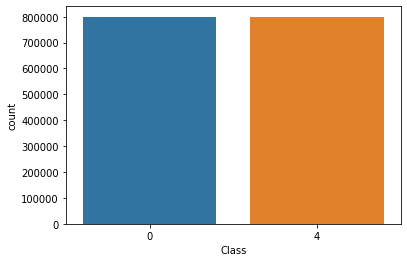

In [ ]:
sns.countplot(x='Class', data=df)

##1.6. Renaming the Classes to 0 and 1

In [ ]:
df['Class'] = df['Class'].replace(4,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

Class  ...                                              Tweet
0       0  ...  is upset that he can't update his Facebook by ...
1       0  ...  @Kenichan I dived many times for the ball. Man...
2       0  ...    my whole body feels itchy and like its on fire 
3       0  ...  @nationwideclass no, it's not behaving at all....
4       0  ...                      @Kwesidei not the whole crew 
..    ...  ...                                                ...
10      1  ...  Just woke up. Having no school is the best fee...
11      1  ...  TheWDB.com - Very cool to hear old Walt interv...
12      1  ...  Are you ready for your MoJo Makeover? Ask me f...
13      1  ...  Happy 38th Birthday to my boo of alll time!!! ...
14      1  ...  happy #charitytuesday @theNSPCC @SparksCharity...

[1598314 rows x 5 columns]

##1.7. Converting Tweets to Lower Case

In [ ]:
df.Tweet = df.Tweet.str.lower()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df

Class  ...                                              Tweet
0       0  ...  is upset that he can't update his facebook by ...
1       0  ...  @kenichan i dived many times for the ball. man...
2       0  ...    my whole body feels itchy and like its on fire 
3       0  ...  @nationwideclass no, it's not behaving at all....
4       0  ...                      @kwesidei not the whole crew 
..    ...  ...                                                ...
10      1  ...  just woke up. having no school is the best fee...
11      1  ...  thewdb.com - very cool to hear old walt interv...
12      1  ...  are you ready for your mojo makeover? ask me f...
13      1  ...  happy 38th birthday to my boo of alll time!!! ...
14      1  ...  happy #charitytuesday @thenspcc @sparkscharity...

[1598314 rows x 5 columns]

##1.8. Removing Stop Words and Letters Repeating More than 2 Times

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'([a-z])\1+', r'\1\1', text)
df['Tweet'] = df['Tweet'].apply(lambda x: cleaning_repeating_char(x))
df

Class          Id                Date             User  \
0       0  1467810672 2009-04-06 22:19:49    scotthamilton   
1       0  1467810917 2009-04-06 22:19:53         mattycus   
2       0  1467811184 2009-04-06 22:19:57          ElleCTF   
3       0  1467811193 2009-04-06 22:19:57           Karoli   
4       0  1467811372 2009-04-06 22:20:00         joy_wolf   
..    ...         ...                 ...              ...   
10      1  2193601966 2009-06-16 08:40:49  AmandaMarie1028   
11      1  2193601969 2009-06-16 08:40:49      TheWDBoards   
12      1  2193601991 2009-06-16 08:40:49           bpbabe   
13      1  2193602064 2009-06-16 08:40:49     tinydiamondz   
14      1  2193602129 2009-06-16 08:40:50   RyanTrevMorris   

                                                Tweet  \
0   is upset that he can't update his facebook by ...   
1   @kenichan i dived many times for the ball. man...   
2     my whole body feels itchy and like its on fire    
3   @nationwideclass no, it's not behaving at all....   
4                       @kwesidei not the whole crew    
..                                                ...   
10  just woke up. having no school is the best fee...   
11  thewdb.com - very cool to hear old walt interv...   
12  are you ready for your mojo makeover? ask me f...   
13  happy 38th birthday to my boo of all time!!! t...   
14  happy #charitytuesday @thenspcc @sparkscharity...   

                                  TweetMinusStopWords  \
0   upset cant update facebook texting it might cr...   
1   dived many times ball managed save  rest go bo...   
2                    whole body feels itchy like fire   
3          no behaving all im mad here cant see there   
4                                          whole crew   
..                                                ...   
10                   woke up school best feeling ever   
11                    cool hear old walt interviews ♫   
12                    ready mojo makeover ask details   
13      happy th birthday boo time tupac amaru shakur   
14                                              happy   

                                          TweetTokens  \
0   [upset, cant, update, facebook, texting, it, m...   
1   [dived, many, time, ball, managed, save, rest,...   
2              [whole, body, feel, itchy, like, fire]   
3   [no, behaving, all, im, mad, here, cant, see, ...   
4                                       [whole, crew]   
..                                                ...   
10            [woke, up, school, best, feeling, ever]   
11              [cool, hear, old, walt, interview, ♫]   
12               [ready, mojo, makeover, ask, detail]   
13  [happy, th, birthday, boo, time, tupac, amaru,...   
14                                            [happy]   

                                   TweetTokensStemmed  
0   [upset, cant, updat, facebook, text, it, might...  
1   [dive, mani, time, ball, manag, save, rest, go...  
2              [whole, bodi, feel, itchi, like, fire]  
3   [no, behav, all, im, mad, here, cant, see, there]  
4                                       [whole, crew]  
..                                                ...  
10               [woke, up, school, best, feel, ever]  
11              [cool, hear, old, walt, interview, ♫]  
12                 [readi, mojo, makeov, ask, detail]  
13  [happi, th, birthday, boo, time, tupac, amaru,...  
14                                            [happi]  

[1598314 rows x 8 columns]

In [ ]:
nltk.download('stopwords')

negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not", "i'm":"i am"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')


stopwords = nltk.corpus.stopwords.words('english')
stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['TweetMinusStopWords'] = [neg_pattern.sub(lambda x: negations_dic[x.group()], x) for x in df.Tweet]

df['TweetMinusStopWords'] = df['TweetMinusStopWords'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [ ]:
df

Class          Id                Date             User  \
0       0  1467810672 2009-04-06 22:19:49    scotthamilton   
1       0  1467810917 2009-04-06 22:19:53         mattycus   
2       0  1467811184 2009-04-06 22:19:57          ElleCTF   
3       0  1467811193 2009-04-06 22:19:57           Karoli   
4       0  1467811372 2009-04-06 22:20:00         joy_wolf   
..    ...         ...                 ...              ...   
10      1  2193601966 2009-06-16 08:40:49  AmandaMarie1028   
11      1  2193601969 2009-06-16 08:40:49      TheWDBoards   
12      1  2193601991 2009-06-16 08:40:49           bpbabe   
13      1  2193602064 2009-06-16 08:40:49     tinydiamondz   
14      1  2193602129 2009-06-16 08:40:50   RyanTrevMorris   

                                                Tweet  \
0   is upset that he can't update his facebook by ...   
1   @kenichan i dived many times for the ball. man...   
2     my whole body feels itchy and like its on fire    
3   @nationwideclass no, it's not behaving at all....   
4                       @kwesidei not the whole crew    
..                                                ...   
10  just woke up. having no school is the best fee...   
11  thewdb.com - very cool to hear old walt interv...   
12  are you ready for your mojo makeover? ask me f...   
13  happy 38th birthday to my boo of all time!!! t...   
14  happy #charitytuesday @thenspcc @sparkscharity...   

                                  TweetMinusStopWords  \
0   upset not update facebook texting it... might ...   
1   @kenichan dived many times ball. managed save ...   
2                    whole body feels itchy like fire   
3   @nationwideclass no, not behaving all. mad. he...   
4                            @kwesidei not whole crew   
..                                                ...   
10                  woke up. school best feeling ever   
11  thewdb.com - cool hear old walt interviews! ♫ ...   
12                   ready mojo makeover? ask details   
13  happy 38th birthday boo time!!! tupac amaru sh...   
14  happy #charitytuesday @thenspcc @sparkscharity...   

                                          TweetTokens  \
0   [upset, cant, update, facebook, texting, it, m...   
1   [dived, many, time, ball, managed, save, rest,...   
2              [whole, body, feel, itchy, like, fire]   
3   [no, behaving, all, im, mad, here, cant, see, ...   
4                                       [whole, crew]   
..                                                ...   
10            [woke, up, school, best, feeling, ever]   
11              [cool, hear, old, walt, interview, ♫]   
12               [ready, mojo, makeover, ask, detail]   
13  [happy, th, birthday, boo, time, tupac, amaru,...   
14                                            [happy]   

                                   TweetTokensStemmed  
0   [upset, cant, updat, facebook, text, it, might...  
1   [dive, mani, time, ball, manag, save, rest, go...  
2              [whole, bodi, feel, itchi, like, fire]  
3   [no, behav, all, im, mad, here, cant, see, there]  
4                                       [whole, crew]  
..                                                ...  
10               [woke, up, school, best, feel, ever]  
11              [cool, hear, old, walt, interview, ♫]  
12                 [readi, mojo, makeov, ask, detail]  
13  [happi, th, birthday, boo, time, tupac, amaru,...  
14                                            [happi]  

[1598314 rows x 8 columns]

##1.9. Removing @ and Hashtag Words

In [ ]:
df['TweetMinusStopWords'] = df['TweetMinusStopWords'].apply(lambda x: ' '.join([word for word in x.split() if (re.match('^(?!@+).', word))]))


In [ ]:
df['TweetMinusStopWords'] = df['TweetMinusStopWords'].apply(lambda x: ' '.join([word for word in x.split() if (re.match('^(?!#+).', word))]))


In [ ]:
df

Class          Id                Date             User  \
0       0  1467810672 2009-04-06 22:19:49    scotthamilton   
1       0  1467810917 2009-04-06 22:19:53         mattycus   
2       0  1467811184 2009-04-06 22:19:57          ElleCTF   
3       0  1467811193 2009-04-06 22:19:57           Karoli   
4       0  1467811372 2009-04-06 22:20:00         joy_wolf   
..    ...         ...                 ...              ...   
10      1  2193601966 2009-06-16 08:40:49  AmandaMarie1028   
11      1  2193601969 2009-06-16 08:40:49      TheWDBoards   
12      1  2193601991 2009-06-16 08:40:49           bpbabe   
13      1  2193602064 2009-06-16 08:40:49     tinydiamondz   
14      1  2193602129 2009-06-16 08:40:50   RyanTrevMorris   

                                                Tweet  \
0   is upset that he can't update his facebook by ...   
1   @kenichan i dived many times for the ball. man...   
2     my whole body feels itchy and like its on fire    
3   @nationwideclass no, it's not behaving at all....   
4                       @kwesidei not the whole crew    
..                                                ...   
10  just woke up. having no school is the best fee...   
11  thewdb.com - very cool to hear old walt interv...   
12  are you ready for your mojo makeover? ask me f...   
13  happy 38th birthday to my boo of all time!!! t...   
14  happy #charitytuesday @thenspcc @sparkscharity...   

                                  TweetMinusStopWords  \
0   upset not update facebook texting it... might ...   
1   dived many times ball. managed save 50% rest g...   
2                    whole body feels itchy like fire   
3     no, not behaving all. mad. here? not see there.   
4                                      not whole crew   
..                                                ...   
10                  woke up. school best feeling ever   
11  thewdb.com - cool hear old walt interviews! ♫ ...   
12                   ready mojo makeover? ask details   
13  happy 38th birthday boo time!!! tupac amaru sh...   
14                                              happy   

                                          TweetTokens  \
0   [upset, cant, update, facebook, texting, it, m...   
1   [dived, many, time, ball, managed, save, rest,...   
2              [whole, body, feel, itchy, like, fire]   
3   [no, behaving, all, im, mad, here, cant, see, ...   
4                                       [whole, crew]   
..                                                ...   
10            [woke, up, school, best, feeling, ever]   
11              [cool, hear, old, walt, interview, ♫]   
12               [ready, mojo, makeover, ask, detail]   
13  [happy, th, birthday, boo, time, tupac, amaru,...   
14                                            [happy]   

                                   TweetTokensStemmed  
0   [upset, cant, updat, facebook, text, it, might...  
1   [dive, mani, time, ball, manag, save, rest, go...  
2              [whole, bodi, feel, itchi, like, fire]  
3   [no, behav, all, im, mad, here, cant, see, there]  
4                                       [whole, crew]  
..                                                ...  
10               [woke, up, school, best, feel, ever]  
11              [cool, hear, old, walt, interview, ♫]  
12                 [readi, mojo, makeov, ask, detail]  
13  [happi, th, birthday, boo, time, tupac, amaru,...  
14                                            [happi]  

[1598314 rows x 8 columns]

##1.10 Removing URLs

In [ ]:
df['TweetMinusStopWords'] = df['TweetMinusStopWords'].apply(lambda x: ' '.join([word for word in x.split() if (re.match('^(?!^(http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?[a-z0-9]+([\-\.]{1}[a-z0-9]+)*\.[a-z]{2,5}(:[0-9]{1,5})?(\/.*)?$).', word))]))

In [ ]:
df

Class          Id                Date             User  \
0       0  1467810672 2009-04-06 22:19:49    scotthamilton   
1       0  1467810917 2009-04-06 22:19:53         mattycus   
2       0  1467811184 2009-04-06 22:19:57          ElleCTF   
3       0  1467811193 2009-04-06 22:19:57           Karoli   
4       0  1467811372 2009-04-06 22:20:00         joy_wolf   
..    ...         ...                 ...              ...   
10      1  2193601966 2009-06-16 08:40:49  AmandaMarie1028   
11      1  2193601969 2009-06-16 08:40:49      TheWDBoards   
12      1  2193601991 2009-06-16 08:40:49           bpbabe   
13      1  2193602064 2009-06-16 08:40:49     tinydiamondz   
14      1  2193602129 2009-06-16 08:40:50   RyanTrevMorris   

                                                Tweet  \
0   is upset that he can't update his facebook by ...   
1   @kenichan i dived many times for the ball. man...   
2     my whole body feels itchy and like its on fire    
3   @nationwideclass no, it's not behaving at all....   
4                       @kwesidei not the whole crew    
..                                                ...   
10  just woke up. having no school is the best fee...   
11  thewdb.com - very cool to hear old walt interv...   
12  are you ready for your mojo makeover? ask me f...   
13  happy 38th birthday to my boo of all time!!! t...   
14  happy #charitytuesday @thenspcc @sparkscharity...   

                                  TweetMinusStopWords  \
0   upset not update facebook texting it... might ...   
1   dived many times ball. managed save 50% rest g...   
2                    whole body feels itchy like fire   
3     no, not behaving all. mad. here? not see there.   
4                                      not whole crew   
..                                                ...   
10                  woke up. school best feeling ever   
11                 - cool hear old walt interviews! ♫   
12                   ready mojo makeover? ask details   
13  happy 38th birthday boo time!!! tupac amaru sh...   
14                                              happy   

                                          TweetTokens  \
0   [upset, cant, update, facebook, texting, it, m...   
1   [dived, many, time, ball, managed, save, rest,...   
2              [whole, body, feel, itchy, like, fire]   
3   [no, behaving, all, im, mad, here, cant, see, ...   
4                                       [whole, crew]   
..                                                ...   
10            [woke, up, school, best, feeling, ever]   
11              [cool, hear, old, walt, interview, ♫]   
12               [ready, mojo, makeover, ask, detail]   
13  [happy, th, birthday, boo, time, tupac, amaru,...   
14                                            [happy]   

                                   TweetTokensStemmed  
0   [upset, cant, updat, facebook, text, it, might...  
1   [dive, mani, time, ball, manag, save, rest, go...  
2              [whole, bodi, feel, itchi, like, fire]  
3   [no, behav, all, im, mad, here, cant, see, there]  
4                                       [whole, crew]  
..                                                ...  
10               [woke, up, school, best, feel, ever]  
11              [cool, hear, old, walt, interview, ♫]  
12                 [readi, mojo, makeov, ask, detail]  
13  [happi, th, birthday, boo, time, tupac, amaru,...  
14                                            [happi]  

[1598314 rows x 8 columns]

##1.11 Removing Numbers

In [ ]:
df['TweetMinusStopWords'] = df['TweetMinusStopWords'].apply(lambda x: re.sub('[0-9]+', '', x))

In [ ]:
df

Class          Id                Date             User  \
0       0  1467810672 2009-04-06 22:19:49    scotthamilton   
1       0  1467810917 2009-04-06 22:19:53         mattycus   
2       0  1467811184 2009-04-06 22:19:57          ElleCTF   
3       0  1467811193 2009-04-06 22:19:57           Karoli   
4       0  1467811372 2009-04-06 22:20:00         joy_wolf   
..    ...         ...                 ...              ...   
10      1  2193601966 2009-06-16 08:40:49  AmandaMarie1028   
11      1  2193601969 2009-06-16 08:40:49      TheWDBoards   
12      1  2193601991 2009-06-16 08:40:49           bpbabe   
13      1  2193602064 2009-06-16 08:40:49     tinydiamondz   
14      1  2193602129 2009-06-16 08:40:50   RyanTrevMorris   

                                                Tweet  \
0   is upset that he can't update his facebook by ...   
1   @kenichan i dived many times for the ball. man...   
2     my whole body feels itchy and like its on fire    
3   @nationwideclass no, it's not behaving at all....   
4                       @kwesidei not the whole crew    
..                                                ...   
10  just woke up. having no school is the best fee...   
11  thewdb.com - very cool to hear old walt interv...   
12  are you ready for your mojo makeover? ask me f...   
13  happy 38th birthday to my boo of all time!!! t...   
14  happy #charitytuesday @thenspcc @sparkscharity...   

                                  TweetMinusStopWords  \
0   upset not update facebook texting it... might ...   
1   dived many times ball. managed save % rest go ...   
2                    whole body feels itchy like fire   
3     no, not behaving all. mad. here? not see there.   
4                                      not whole crew   
..                                                ...   
10                  woke up. school best feeling ever   
11                 - cool hear old walt interviews! ♫   
12                   ready mojo makeover? ask details   
13   happy th birthday boo time!!! tupac amaru shakur   
14                                              happy   

                                          TweetTokens  \
0   [upset, cant, update, facebook, texting, it, m...   
1   [dived, many, time, ball, managed, save, rest,...   
2              [whole, body, feel, itchy, like, fire]   
3   [no, behaving, all, im, mad, here, cant, see, ...   
4                                       [whole, crew]   
..                                                ...   
10            [woke, up, school, best, feeling, ever]   
11              [cool, hear, old, walt, interview, ♫]   
12               [ready, mojo, makeover, ask, detail]   
13  [happy, th, birthday, boo, time, tupac, amaru,...   
14                                            [happy]   

                                   TweetTokensStemmed  
0   [upset, cant, updat, facebook, text, it, might...  
1   [dive, mani, time, ball, manag, save, rest, go...  
2              [whole, bodi, feel, itchi, like, fire]  
3   [no, behav, all, im, mad, here, cant, see, there]  
4                                       [whole, crew]  
..                                                ...  
10               [woke, up, school, best, feel, ever]  
11              [cool, hear, old, walt, interview, ♫]  
12                 [readi, mojo, makeov, ask, detail]  
13  [happi, th, birthday, boo, time, tupac, amaru,...  
14                                            [happi]  

[1598314 rows x 8 columns]

##1.12 Removing Punctuations

In [ ]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

df['TweetMinusStopWords'] = df['TweetMinusStopWords'].apply(lambda x: cleaning_punctuations(x))

In [ ]:
df

Class          Id                Date             User  \
0       0  1467810672 2009-04-06 22:19:49    scotthamilton   
1       0  1467810917 2009-04-06 22:19:53         mattycus   
2       0  1467811184 2009-04-06 22:19:57          ElleCTF   
3       0  1467811193 2009-04-06 22:19:57           Karoli   
4       0  1467811372 2009-04-06 22:20:00         joy_wolf   
..    ...         ...                 ...              ...   
10      1  2193601966 2009-06-16 08:40:49  AmandaMarie1028   
11      1  2193601969 2009-06-16 08:40:49      TheWDBoards   
12      1  2193601991 2009-06-16 08:40:49           bpbabe   
13      1  2193602064 2009-06-16 08:40:49     tinydiamondz   
14      1  2193602129 2009-06-16 08:40:50   RyanTrevMorris   

                                                Tweet  \
0   is upset that he can't update his facebook by ...   
1   @kenichan i dived many times for the ball. man...   
2     my whole body feels itchy and like its on fire    
3   @nationwideclass no, it's not behaving at all....   
4                       @kwesidei not the whole crew    
..                                                ...   
10  just woke up. having no school is the best fee...   
11  thewdb.com - very cool to hear old walt interv...   
12  are you ready for your mojo makeover? ask me f...   
13  happy 38th birthday to my boo of all time!!! t...   
14  happy #charitytuesday @thenspcc @sparkscharity...   

                                  TweetMinusStopWords  \
0   upset not update facebook texting it might cry...   
1   dived many times ball managed save  rest go bo...   
2                    whole body feels itchy like fire   
3          no not behaving all mad here not see there   
4                                      not whole crew   
..                                                ...   
10                   woke up school best feeling ever   
11                    cool hear old walt interviews ♫   
12                    ready mojo makeover ask details   
13      happy th birthday boo time tupac amaru shakur   
14                                              happy   

                                          TweetTokens  \
0   [upset, cant, update, facebook, texting, it, m...   
1   [dived, many, time, ball, managed, save, rest,...   
2              [whole, body, feel, itchy, like, fire]   
3   [no, behaving, all, im, mad, here, cant, see, ...   
4                                       [whole, crew]   
..                                                ...   
10            [woke, up, school, best, feeling, ever]   
11              [cool, hear, old, walt, interview, ♫]   
12               [ready, mojo, makeover, ask, detail]   
13  [happy, th, birthday, boo, time, tupac, amaru,...   
14                                            [happy]   

                                   TweetTokensStemmed  
0   [upset, cant, updat, facebook, text, it, might...  
1   [dive, mani, time, ball, manag, save, rest, go...  
2              [whole, bodi, feel, itchi, like, fire]  
3   [no, behav, all, im, mad, here, cant, see, there]  
4                                       [whole, crew]  
..                                                ...  
10               [woke, up, school, best, feel, ever]  
11              [cool, hear, old, walt, interview, ♫]  
12                 [readi, mojo, makeov, ask, detail]  
13  [happi, th, birthday, boo, time, tupac, amaru,...  
14                                            [happi]  

[1598314 rows x 8 columns]

#1.13 Splitting String into List of Words

In [ ]:
tokenizer = RegexpTokenizer(r'+')
df['TweetTokens'] = df['TweetMinusStopWords'].apply(lambda x:str.split(x))
df

Class          Id                Date             User  \
0       0  1467810672 2009-04-06 22:19:49    scotthamilton   
1       0  1467810917 2009-04-06 22:19:53         mattycus   
2       0  1467811184 2009-04-06 22:19:57          ElleCTF   
3       0  1467811193 2009-04-06 22:19:57           Karoli   
4       0  1467811372 2009-04-06 22:20:00         joy_wolf   
..    ...         ...                 ...              ...   
10      1  2193601966 2009-06-16 08:40:49  AmandaMarie1028   
11      1  2193601969 2009-06-16 08:40:49      TheWDBoards   
12      1  2193601991 2009-06-16 08:40:49           bpbabe   
13      1  2193602064 2009-06-16 08:40:49     tinydiamondz   
14      1  2193602129 2009-06-16 08:40:50   RyanTrevMorris   

                                                Tweet  \
0   is upset that he can't update his facebook by ...   
1   @kenichan i dived many times for the ball. man...   
2     my whole body feels itchy and like its on fire    
3   @nationwideclass no, it's not behaving at all....   
4                       @kwesidei not the whole crew    
..                                                ...   
10  just woke up. having no school is the best fee...   
11  thewdb.com - very cool to hear old walt interv...   
12  are you ready for your mojo makeover? ask me f...   
13  happy 38th birthday to my boo of all time!!! t...   
14  happy #charitytuesday @thenspcc @sparkscharity...   

                                  TweetMinusStopWords  \
0   upset not update facebook texting it might cry...   
1   dived many times ball managed save  rest go bo...   
2                    whole body feels itchy like fire   
3          no not behaving all mad here not see there   
4                                      not whole crew   
..                                                ...   
10                   woke up school best feeling ever   
11                    cool hear old walt interviews ♫   
12                    ready mojo makeover ask details   
13      happy th birthday boo time tupac amaru shakur   
14                                              happy   

                                          TweetTokens  \
0   [upset, not, update, facebook, texting, it, mi...   
1   [dived, many, times, ball, managed, save, rest...   
2             [whole, body, feels, itchy, like, fire]   
3   [no, not, behaving, all, mad, here, not, see, ...   
4                                  [not, whole, crew]   
..                                                ...   
10            [woke, up, school, best, feeling, ever]   
11             [cool, hear, old, walt, interviews, ♫]   
12              [ready, mojo, makeover, ask, details]   
13  [happy, th, birthday, boo, time, tupac, amaru,...   
14                                            [happy]   

                                   TweetTokensStemmed  
0   [upset, cant, updat, facebook, text, it, might...  
1   [dive, mani, time, ball, manag, save, rest, go...  
2              [whole, bodi, feel, itchi, like, fire]  
3   [no, behav, all, im, mad, here, cant, see, there]  
4                                       [whole, crew]  
..                                                ...  
10               [woke, up, school, best, feel, ever]  
11              [cool, hear, old, walt, interview, ♫]  
12                 [readi, mojo, makeov, ask, detail]  
13  [happi, th, birthday, boo, time, tupac, amaru,...  
14                                            [happi]  

[1598314 rows x 8 columns]

##1.14 Getting Root Words (Stemming and Lemmatizing)

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
st = nltk.PorterStemmer()
lm = nltk.WordNetLemmatizer()
def lem(data):
    text = [lm.lemmatize(word) for word in data]
    return text

df['TweetTokens'] = df['TweetTokens'].apply(lambda x: lem(x))
df

Class          Id                Date             User  \
0       0  1467810672 2009-04-06 22:19:49    scotthamilton   
1       0  1467810917 2009-04-06 22:19:53         mattycus   
2       0  1467811184 2009-04-06 22:19:57          ElleCTF   
3       0  1467811193 2009-04-06 22:19:57           Karoli   
4       0  1467811372 2009-04-06 22:20:00         joy_wolf   
..    ...         ...                 ...              ...   
10      1  2193601966 2009-06-16 08:40:49  AmandaMarie1028   
11      1  2193601969 2009-06-16 08:40:49      TheWDBoards   
12      1  2193601991 2009-06-16 08:40:49           bpbabe   
13      1  2193602064 2009-06-16 08:40:49     tinydiamondz   
14      1  2193602129 2009-06-16 08:40:50   RyanTrevMorris   

                                                Tweet  \
0   is upset that he can't update his facebook by ...   
1   @kenichan i dived many times for the ball. man...   
2     my whole body feels itchy and like its on fire    
3   @nationwideclass no, it's not behaving at all....   
4                       @kwesidei not the whole crew    
..                                                ...   
10  just woke up. having no school is the best fee...   
11  thewdb.com - very cool to hear old walt interv...   
12  are you ready for your mojo makeover? ask me f...   
13  happy 38th birthday to my boo of all time!!! t...   
14  happy #charitytuesday @thenspcc @sparkscharity...   

                                  TweetMinusStopWords  \
0   upset not update facebook texting it might cry...   
1   dived many times ball managed save  rest go bo...   
2                    whole body feels itchy like fire   
3          no not behaving all mad here not see there   
4                                      not whole crew   
..                                                ...   
10                   woke up school best feeling ever   
11                    cool hear old walt interviews ♫   
12                    ready mojo makeover ask details   
13      happy th birthday boo time tupac amaru shakur   
14                                              happy   

                                          TweetTokens  \
0   [upset, not, update, facebook, texting, it, mi...   
1   [dived, many, time, ball, managed, save, rest,...   
2              [whole, body, feel, itchy, like, fire]   
3   [no, not, behaving, all, mad, here, not, see, ...   
4                                  [not, whole, crew]   
..                                                ...   
10            [woke, up, school, best, feeling, ever]   
11              [cool, hear, old, walt, interview, ♫]   
12               [ready, mojo, makeover, ask, detail]   
13  [happy, th, birthday, boo, time, tupac, amaru,...   
14                                            [happy]   

                                   TweetTokensStemmed  
0   [upset, cant, updat, facebook, text, it, might...  
1   [dive, mani, time, ball, manag, save, rest, go...  
2              [whole, bodi, feel, itchi, like, fire]  
3   [no, behav, all, im, mad, here, cant, see, there]  
4                                       [whole, crew]  
..                                                ...  
10               [woke, up, school, best, feel, ever]  
11              [cool, hear, old, walt, interview, ♫]  
12                 [readi, mojo, makeov, ask, detail]  
13  [happi, th, birthday, boo, time, tupac, amaru,...  
14                                            [happi]  

[1598314 rows x 8 columns]

In [ ]:
df

Class          Id                Date             User  \
0       0  1467810672 2009-04-06 22:19:49    scotthamilton   
1       0  1467810917 2009-04-06 22:19:53         mattycus   
2       0  1467811184 2009-04-06 22:19:57          ElleCTF   
3       0  1467811193 2009-04-06 22:19:57           Karoli   
4       0  1467811372 2009-04-06 22:20:00         joy_wolf   
..    ...         ...                 ...              ...   
10      1  2193601966 2009-06-16 08:40:49  AmandaMarie1028   
11      1  2193601969 2009-06-16 08:40:49      TheWDBoards   
12      1  2193601991 2009-06-16 08:40:49           bpbabe   
13      1  2193602064 2009-06-16 08:40:49     tinydiamondz   
14      1  2193602129 2009-06-16 08:40:50   RyanTrevMorris   

                                                Tweet  \
0   is upset that he can't update his facebook by ...   
1   @kenichan i dived many times for the ball. man...   
2     my whole body feels itchy and like its on fire    
3   @nationwideclass no, it's not behaving at all....   
4                       @kwesidei not the whole crew    
..                                                ...   
10  just woke up. having no school is the best fee...   
11  thewdb.com - very cool to hear old walt interv...   
12  are you ready for your mojo makeover? ask me f...   
13  happy 38th birthday to my boo of all time!!! t...   
14  happy #charitytuesday @thenspcc @sparkscharity...   

                                  TweetMinusStopWords  \
0   upset not update facebook texting it might cry...   
1   dived many times ball managed save  rest go bo...   
2                    whole body feels itchy like fire   
3          no not behaving all mad here not see there   
4                                      not whole crew   
..                                                ...   
10                   woke up school best feeling ever   
11                    cool hear old walt interviews ♫   
12                    ready mojo makeover ask details   
13      happy th birthday boo time tupac amaru shakur   
14                                              happy   

                                          TweetTokens  \
0   [upset, not, update, facebook, texting, it, mi...   
1   [dived, many, time, ball, managed, save, rest,...   
2              [whole, body, feel, itchy, like, fire]   
3   [no, not, behaving, all, mad, here, not, see, ...   
4                                  [not, whole, crew]   
..                                                ...   
10            [woke, up, school, best, feeling, ever]   
11              [cool, hear, old, walt, interview, ♫]   
12               [ready, mojo, makeover, ask, detail]   
13  [happy, th, birthday, boo, time, tupac, amaru,...   
14                                            [happy]   

                                   TweetTokensStemmed  
0   [upset, cant, updat, facebook, text, it, might...  
1   [dive, mani, time, ball, manag, save, rest, go...  
2              [whole, bodi, feel, itchi, like, fire]  
3   [no, behav, all, im, mad, here, cant, see, there]  
4                                       [whole, crew]  
..                                                ...  
10               [woke, up, school, best, feel, ever]  
11              [cool, hear, old, walt, interview, ♫]  
12                 [readi, mojo, makeov, ask, detail]  
13  [happi, th, birthday, boo, time, tupac, amaru,...  
14                                            [happi]  

[1598314 rows x 8 columns]

In [ ]:
def lem(data):
    text = [st.stem(word) for word in data]
    return text

df['TweetTokensStemmed'] = df['TweetTokens'].apply(lambda x: lem(x))
df

Class          Id                Date             User  \
0       0  1467810672 2009-04-06 22:19:49    scotthamilton   
1       0  1467810917 2009-04-06 22:19:53         mattycus   
2       0  1467811184 2009-04-06 22:19:57          ElleCTF   
3       0  1467811193 2009-04-06 22:19:57           Karoli   
4       0  1467811372 2009-04-06 22:20:00         joy_wolf   
..    ...         ...                 ...              ...   
10      1  2193601966 2009-06-16 08:40:49  AmandaMarie1028   
11      1  2193601969 2009-06-16 08:40:49      TheWDBoards   
12      1  2193601991 2009-06-16 08:40:49           bpbabe   
13      1  2193602064 2009-06-16 08:40:49     tinydiamondz   
14      1  2193602129 2009-06-16 08:40:50   RyanTrevMorris   

                                                Tweet  \
0   is upset that he can't update his facebook by ...   
1   @kenichan i dived many times for the ball. man...   
2     my whole body feels itchy and like its on fire    
3   @nationwideclass no, it's not behaving at all....   
4                       @kwesidei not the whole crew    
..                                                ...   
10  just woke up. having no school is the best fee...   
11  thewdb.com - very cool to hear old walt interv...   
12  are you ready for your mojo makeover? ask me f...   
13  happy 38th birthday to my boo of all time!!! t...   
14  happy #charitytuesday @thenspcc @sparkscharity...   

                                  TweetMinusStopWords  \
0   upset not update facebook texting it might cry...   
1   dived many times ball managed save  rest go bo...   
2                    whole body feels itchy like fire   
3          no not behaving all mad here not see there   
4                                      not whole crew   
..                                                ...   
10                   woke up school best feeling ever   
11                    cool hear old walt interviews ♫   
12                    ready mojo makeover ask details   
13      happy th birthday boo time tupac amaru shakur   
14                                              happy   

                                          TweetTokens  \
0   [upset, not, update, facebook, texting, it, mi...   
1   [dived, many, time, ball, managed, save, rest,...   
2              [whole, body, feel, itchy, like, fire]   
3   [no, not, behaving, all, mad, here, not, see, ...   
4                                  [not, whole, crew]   
..                                                ...   
10            [woke, up, school, best, feeling, ever]   
11              [cool, hear, old, walt, interview, ♫]   
12               [ready, mojo, makeover, ask, detail]   
13  [happy, th, birthday, boo, time, tupac, amaru,...   
14                                            [happy]   

                                   TweetTokensStemmed  
0   [upset, not, updat, facebook, text, it, might,...  
1   [dive, mani, time, ball, manag, save, rest, go...  
2              [whole, bodi, feel, itchi, like, fire]  
3   [no, not, behav, all, mad, here, not, see, there]  
4                                  [not, whole, crew]  
..                                                ...  
10               [woke, up, school, best, feel, ever]  
11              [cool, hear, old, walt, interview, ♫]  
12                 [readi, mojo, makeov, ask, detail]  
13  [happi, th, birthday, boo, time, tupac, amaru,...  
14                                            [happi]  

[1598314 rows x 8 columns]

#2. Preliminary Analysis

##2.1. Most Common Words

<Figure size 1440x1440 with 0 Axes>

Text(0.5, 1.0, 'Most Common Words Overall')

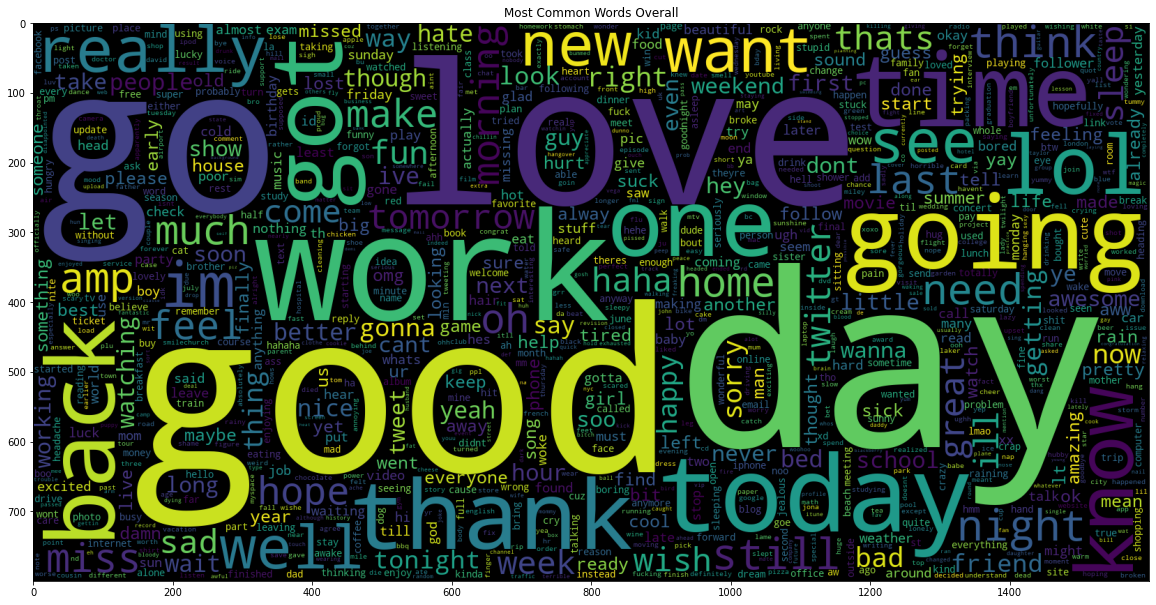

In [ ]:
data_neg = df['TweetMinusStopWords']
plt.figure(figsize = (20,20))
plt.title('Most Common Words Overall')
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

<Figure size 1440x1440 with 0 Axes>

Text(0.5, 1.0, 'Most Common Words in Class 0')

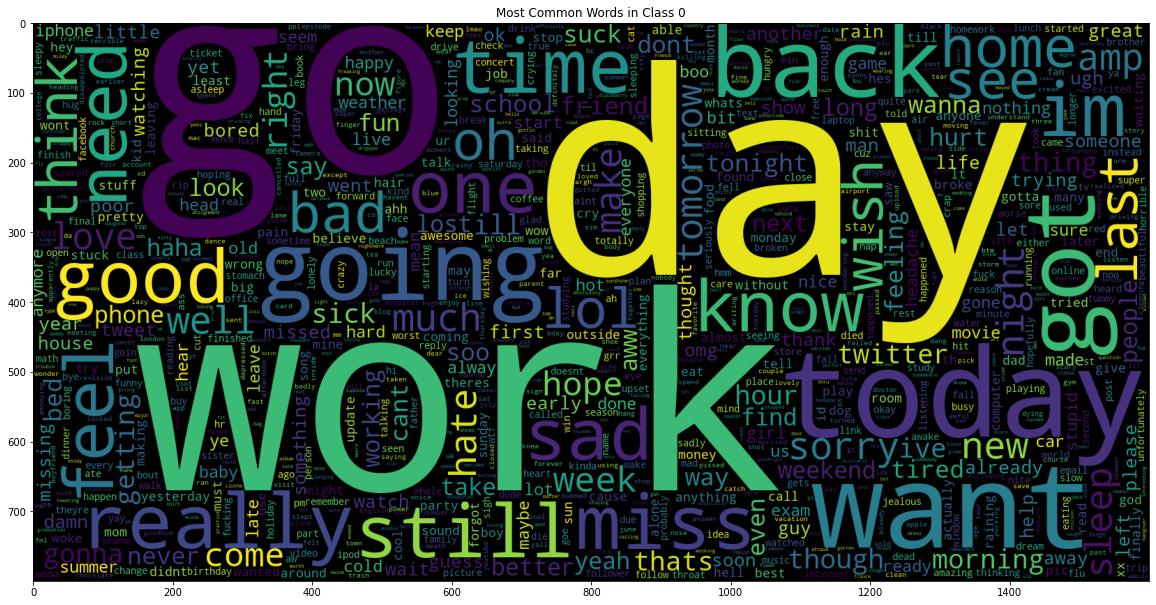

In [ ]:
data_neg = df['TweetMinusStopWords'][df['Class'] == 0]
plt.figure(figsize = (20,20))
plt.title('Most Common Words in Class 0')
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

<Figure size 1440x1440 with 0 Axes>

Text(0.5, 1.0, 'Most Common Words in Class 4')

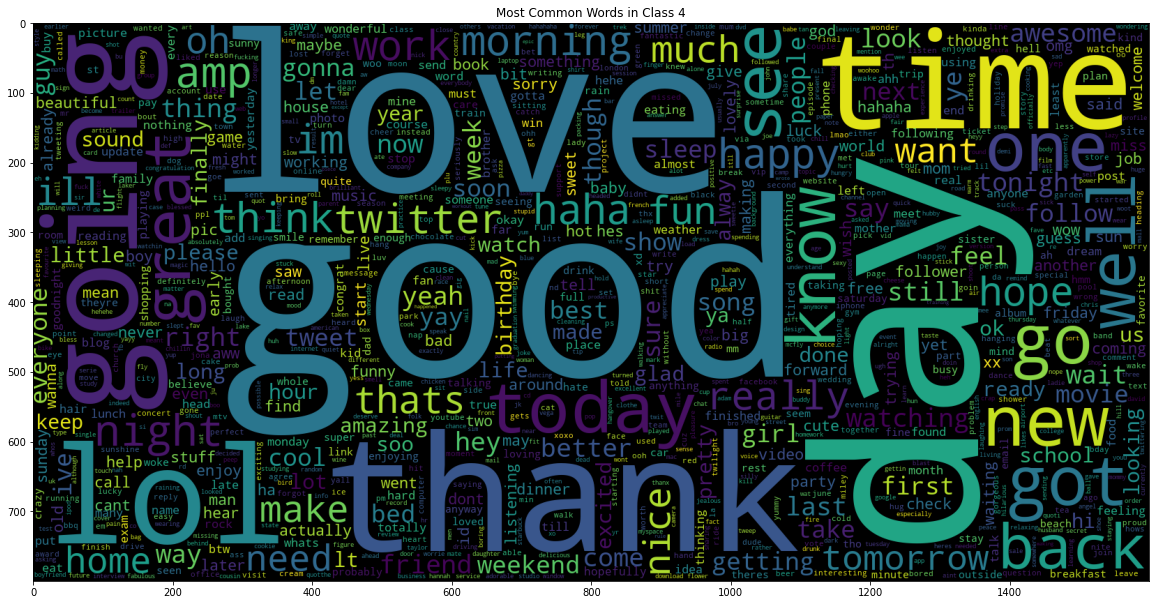

In [ ]:
data_neg = df['TweetMinusStopWords'][df['Class'] == 1]
plt.figure(figsize = (20,20))
plt.title('Most Common Words in Class 4')
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

##2.2. Most Common Bigrams

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['TweetMinusStopWords'], 20)
df3 = pd.DataFrame(common_words, columns = ['Tweet' , 'Count'])


In [ ]:
configure_plotly_browser_state()
df3.groupby('Tweet').sum()['Count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 Bigrams Overall')

In [ ]:
common_words = get_top_n_bigram(df['TweetMinusStopWords'][df.Class == 0], 20)
df1 = pd.DataFrame(common_words, columns = ['Tweet' , 'Count'])
common_words = get_top_n_bigram(df['TweetMinusStopWords'][df.Class == 1], 20)
df2 = pd.DataFrame(common_words, columns = ['Tweet' , 'Count'])

In [ ]:
configure_plotly_browser_state()
df1.groupby('Tweet').sum()['Count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 Bigrams for Class 0')

In [ ]:
configure_plotly_browser_state()
df2.groupby('Tweet').sum()['Count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 Bigrams for Class 4')

##2.3. Most Common Trigrams

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['TweetMinusStopWords'], 20)
df4 = pd.DataFrame(common_words, columns = ['Tweet' , 'Count'])

In [ ]:
configure_plotly_browser_state()
df4.groupby('Tweet').sum()['Count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 Trigrams Overall')

In [ ]:
common_words = get_top_n_trigram(df['TweetMinusStopWords'][df.Class == 0], 20)
df5 = pd.DataFrame(common_words, columns = ['Tweet' , 'Count'])
common_words = get_top_n_trigram(df['TweetMinusStopWords'][df.Class == 1], 20)
df6 = pd.DataFrame(common_words, columns = ['Tweet' , 'Count'])

In [ ]:
configure_plotly_browser_state()
df5.groupby('Tweet').sum()['Count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 Trigrams for Class 0')

In [ ]:
configure_plotly_browser_state()
df6.groupby('Tweet').sum()['Count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 Trigrams for Class 4')

##2.3. Temporal Analysis

In [ ]:
bins = np.linspace(0, 24, 25)
df['TimeBin'] = pd.cut(df.Date.dt.hour, bins, labels=np.linspace(1, 24, 24), right=False)

In [ ]:
df3

Tweet  Count
0        last night  11805
1      good morning  10154
2          not wait   9756
3           not get   9042
4          not know   8503
5        wish could   6569
6         feel like   6539
7          not want   6333
8         right now   6114
9          not even   5986
10  looking forward   5540
11        could not   5509
12         not good   5128
13       looks like   5095
14        good luck   4975
15    getting ready   4933
16          want go   4787
17        not think   4424
18       good night   4420
19         not like   4306

###2.3.1. Temporal Variation in Bigrams

In [ ]:
hourly = pd.DataFrame(data={'Hour': np.linspace(0, 24, 25)})
for i in df3.Tweet:
  h = df['TweetMinusStopWords'].apply(lambda x: x.count(i))  
  d = pd.DataFrame(data={i: h})
  d['TimeBin'] = df.TimeBin
  g = d.groupby("TimeBin")
  g = g[i].sum()
  hourly = pd.concat([hourly, g], axis=1)

In [ ]:
hourly

Hour  last night  good morning  not wait  not get  not know  wish could  \
0    0.0         NaN           NaN       NaN      NaN       NaN         NaN   
1    1.0       537.0         665.0     573.0    435.0     381.0       280.0   
2    2.0       581.0         754.0     498.0    403.0     376.0       213.0   
3    3.0       651.0         722.0     466.0    376.0     328.0       193.0   
4    4.0       721.0         800.0     491.0    403.0     366.0       201.0   
5    5.0       873.0        1109.0     494.0    415.0     390.0       278.0   
6    6.0       961.0        1257.0     491.0    492.0     418.0       272.0   
7    7.0       996.0        1265.0     511.0    491.0     432.0       302.0   
8    8.0      1076.0        1130.0     549.0    549.0     452.0       351.0   
9    9.0       936.0         680.0     470.0    520.0     407.0       404.0   
10  10.0       754.0         414.0     436.0    456.0     392.0       340.0   
11  11.0       597.0         184.0     410.0    391.0     363.0       273.0   
12  12.0       551.0          97.0     416.0    414.0     391.0       281.0   
13  13.0       341.0          32.0     328.0    325.0     306.0       270.0   
14  14.0       323.0          24.0     335.0    364.0     296.0       281.0   
15  15.0       275.0          28.0     365.0    328.0     272.0       242.0   
16  16.0       265.0          61.0     318.0    358.0     282.0       245.0   
17  17.0       296.0          90.0     353.0    409.0     337.0       291.0   
18  18.0       248.0          81.0     349.0    331.0     295.0       313.0   
19  19.0       233.0         131.0     327.0    372.0     284.0       304.0   
20  20.0       249.0         100.0     401.0    456.0     322.0       297.0   
21  21.0       262.0          84.0     376.0    403.0     343.0       308.0   
22  22.0       256.0         120.0     445.0    501.0     420.0       315.0   
23  23.0       331.0         251.0     527.0    527.0     450.0       367.0   
24  24.0       394.0         489.0     541.0    521.0     450.0       320.0   

    feel like  not want  right now  not even  looking forward  could not  \
0         NaN       NaN        NaN       NaN              NaN        NaN   
1       307.0     305.0      299.0     272.0            349.0      238.0   
2       302.0     248.0      238.0     270.0            356.0      215.0   
3       223.0     260.0      237.0     265.0            357.0      230.0   
4       253.0     278.0      222.0     247.0            322.0      232.0   
5       305.0     333.0      255.0     252.0            331.0      254.0   
6       328.0     317.0      276.0     253.0            342.0      272.0   
7       308.0     403.0      274.0     286.0            337.0      280.0   
8       328.0     419.0      273.0     315.0            320.0      305.0   
9       348.0     326.0      275.0     325.0            286.0      259.0   
10      281.0     280.0      267.0     278.0            246.0      240.0   
11      253.0     260.0      236.0     228.0            198.0      199.0   
12      253.0     250.0      247.0     224.0            198.0      236.0   
13      226.0     223.0      224.0     190.0            174.0      168.0   
14      210.0     210.0      184.0     199.0            153.0      216.0   
15      197.0     212.0      228.0     182.0            161.0      195.0   
16      205.0     218.0      250.0     195.0            193.0      172.0   
17      211.0     188.0      277.0     220.0            127.0      198.0   
18      217.0     200.0      265.0     231.0            129.0      170.0   
19      228.0     228.0      283.0     194.0            157.0      214.0   
20      273.0     231.0      317.0     242.0            153.0      243.0   
21      287.0     242.0      290.0     275.0            135.0      218.0   
22      351.0     297.0      393.0     279.0            167.0      258.0   
23      339.0     304.0      435.0     344.0            197.0      304.0   
24      359.0     374.0      430.0     308.0     

In [ ]:
hourly.drop('Hour', axis = 1, inplace=True)

In [ ]:
configure_plotly_browser_state()
hourly.iplot(yTitle='Count', xTitle = 'Hour of Day', title='Hourly Variation of Top Bigrams')

In [ ]:
daily = pd.DataFrame(data={'Day': np.linspace(0, 7, 8)})
for i in df3.Tweet:
  h = df['TweetMinusStopWords'].apply(lambda x: x.count(i))  
  d = pd.DataFrame(data={i: h})
  d['TimeBin'] = pd.DatetimeIndex(df['Date']).weekday
  g = d.groupby("TimeBin")
  g = g[i].sum()
  daily = pd.concat([daily, g], axis=1)

In [ ]:
daily

Day  last night  good morning  not wait  not get  not know  wish could  \
0  0.0      1839.0        2638.0    2313.0   1729.0    1527.0      1110.0   
1  1.0      1331.0        1563.0    1198.0   1305.0    1066.0       849.0   
2  2.0       730.0         712.0     489.0    826.0     620.0       538.0   
3  3.0       914.0         512.0     498.0    953.0     774.0       594.0   
4  4.0      1439.0        1001.0    1435.0   1506.0    1201.0      1029.0   
5  5.0      2967.0        1798.0    2090.0   2062.0    1836.0      1546.0   
6  6.0      3487.0        2344.0    2447.0   1859.0    1729.0      1275.0   
7  7.0         NaN           NaN       NaN      NaN       NaN         NaN   

   feel like  not want  right now  not even  looking forward  could not  \
0     1196.0    1202.0     1233.0    1120.0           1146.0      972.0   
1      849.0     752.0      778.0     780.0            665.0      671.0   
2      500.0     528.0      442.0     486.0            348.0      384.0   
3      573.0     591.0      465.0     516.0            349.0      466.0   
4      991.0     876.0     1002.0     832.0            840.0      769.0   
5     1286.0    1216.0     1480.0    1201.0            987.0     1232.0   
6     1197.0    1441.0     1275.0    1139.0           1301.0     1109.0   
7        NaN       NaN        NaN       NaN              NaN        NaN   

   not good  looks like  good luck  getting ready  want go  not think  \
0     977.0       959.0     1210.0          834.0    830.0      791.0   
1     653.0       669.0      637.0          485.0    595.0      552.0   
2     409.0       397.0      280.0          272.0    383.0      338.0   
3     553.0       379.0      245.0          298.0    456.0      363.0   
4     729.0       752.0      626.0          685.0    653.0      661.0   
5    1004.0      1072.0      900.0         1250.0    951.0      933.0   
6    1035.0       995.0     1258.0         1209.0   1051.0      863.0   
7       NaN         NaN        NaN            NaN      NaN        NaN   

   good night  not like  
0       906.0     839.0  
1       529.0     587.0  
2       200.0     309.0  
3       287.0     362.0  
4       637.0     635.0  
5      1121.0     849.0  
6      1125.0     823.0  
7         NaN       NaN

In [ ]:
daily.drop('Day', axis = 1, inplace = True)

In [ ]:
configure_plotly_browser_state()
daily.iplot(yTitle='Count', xTitle = 'Day of Week', title='Daily Variation of Top Bigrams')

###2.3.2 Temporal Variation in Trigrams

In [ ]:
hourly = pd.DataFrame(data={'Hour': np.linspace(0, 24, 25)})
for i in df4.Tweet:
  h = df['TweetMinusStopWords'].apply(lambda x: x.count(i))  
  d = pd.DataFrame(data={i: h})
  d['TimeBin'] = df.TimeBin
  g = d.groupby("TimeBin")
  g = g[i].sum()
  hourly = pd.concat([hourly, g], axis=1)

In [ ]:
hourly

Hour  happy mothers day  not wait see  get followers day  \
0    0.0                NaN           NaN                NaN   
1    1.0              113.0         100.0                0.0   
2    2.0               98.0          71.0                0.0   
3    3.0               71.0          73.0                0.0   
4    4.0              105.0          80.0                0.0   
5    5.0              114.0          67.0                0.0   
6    6.0              189.0          70.0                0.0   
7    7.0              247.0          88.0                0.0   
8    8.0              237.0          87.0                0.0   
9    9.0              246.0          95.0                0.0   
10  10.0              293.0          78.0                0.0   
11  11.0               42.0          47.0                0.0   
12  12.0                3.0          80.0                0.0   
13  13.0                0.0          54.0                0.0   
14  14.0                0.0          59.0                0.0   
15  15.0                1.0          61.0                0.0   
16  16.0                0.0          58.0                0.0   
17  17.0                0.0          61.0                0.0   
18  18.0                1.0          63.0                0.0   
19  19.0               49.0          69.0                0.0   
20  20.0               76.0          61.0                0.0   
21  21.0               71.0          68.0                0.0   
22  22.0              104.0          78.0                0.0   
23  23.0              104.0         109.0                0.0   
24  24.0              102.0          84.0                0.0   

    followers day using  day using add  using add everyone  \
0                   NaN            NaN                 NaN   
1                 192.0          192.0               192.0   
2                 116.0          116.0               116.0   
3                   0.0            0.0                 0.0   
4                   0.0            0.0                 0.0   
5                   0.0            0.0                 0.0   
6                   0.0            0.0                 0.0   
7                   0.0            0.0                 0.0   
8                   0.0            0.0                 0.0   
9                   0.0            0.0                 0.0   
10                 93.0           93.0                93.0   
11                  6.0            6.0                 6.0   
12                182.0          182.0               182.0   
13                 95.0           95.0                95.0   
14                202.0          202.0               202.0   
15                 99.0           99.0                99.0   
16                144.0          144.0               144.0   
17                 81.0           81.0                81.0   
18                 37.0           37.0                37.0   
19                  0.0            0.0                 0.0   
20                  0.0            0.0                 0.0   
21                  0.0            0.0                 0.0   
22                 59.0           59.0                59.0   
23                 94.0           94.0                94.0   
24                 84.0           84.0                84.0   

    add everyone train  everyone train pay  train pay vip  mtv movie awards  \
0                  NaN                 NaN            NaN               NaN   
1                192.0               192.0          192.0              31.0   
2                116.0               116.0          116.0              31.0   
3                  0.0                 0.0            0.0              29.0   
4                  0.0                 0.0            0.0              33.0   
5                  0.0                 0.0            0.0              26.0   
6                  0.0                 0.0            0.0              25.0   
7                  0.0                 0.0            0.0              29.0   
8              

In [ ]:
hourly.drop('Hour', axis = 1, inplace=True)

In [ ]:
configure_plotly_browser_state()
hourly.iplot(yTitle='Count', xTitle = 'Hour of Day', title='Hourly Variation of Top Trigrams')

In [ ]:
daily = pd.DataFrame(data={'Day': np.linspace(0, 7, 8)})
for i in df4.Tweet:
  h = df['TweetMinusStopWords'].apply(lambda x: x.count(i))  
  d = pd.DataFrame(data={i: h})
  d['TimeBin'] = pd.DatetimeIndex(df['Date']).weekday
  g = d.groupby("TimeBin")
  g = g[i].sum()
  daily = pd.concat([daily, g], axis=1)

In [ ]:
daily

Day  happy mothers day  not wait see  get followers day  \
0  0.0                2.0         373.0                0.0   
1  1.0                0.0         168.0                0.0   
2  2.0                0.0          84.0                0.0   
3  3.0                0.0          74.0                0.0   
4  4.0                2.0         230.0                0.0   
5  5.0              407.0         394.0                0.0   
6  6.0             1855.0         438.0                0.0   
7  7.0                NaN           NaN                NaN   

   followers day using  day using add  using add everyone  add everyone train  \
0                628.0          628.0               628.0               628.0   
1                  0.0            0.0                 0.0                 0.0   
2                  0.0            0.0                 0.0                 0.0   
3                  0.0            0.0                 0.0                 0.0   
4                132.0          132.0               132.0               132.0   
5                251.0          251.0               251.0               251.0   
6                473.0          473.0               473.0               473.0   
7                  NaN            NaN                 NaN                 NaN   

   everyone train pay  train pay vip  mtv movie awards  not want go  \
0               628.0          628.0             226.0        216.0   
1                 0.0            0.0              33.0        137.0   
2                 0.0            0.0               9.0         95.0   
3                 0.0            0.0               5.0        113.0   
4               132.0          132.0              55.0        129.0   
5               251.0          251.0              89.0        186.0   
6               473.0          473.0             987.0        317.0   
7                 NaN            NaN               NaN          NaN   

   not looking forward  not feeling well  hope feel better  wish could go  \
0                221.0             208.0             219.0          166.0   
1                128.0             156.0             111.0          136.0   
2                 84.0              93.0              70.0           91.0   
3                101.0             111.0              64.0          104.0   
4                140.0             150.0             128.0          170.0   
5                150.0             200.0             188.0          247.0   
6                328.0             214.0             211.0          201.0   
7                  NaN               NaN               NaN            NaN   

   getting ready go  not feel good  good morning everyone  not wanna go  \
0             136.0          124.0                  174.0         136.0   
1              95.0           92.0                  113.0          90.0   
2              53.0           65.0                   57.0          49.0   
3              52.0           79.0                   38.0          64.0   
4             106.0          103.0                   67.0          64.0   
5             273.0          140.0                  111.0         118.0   
6             255.0          132.0                  142.0         148.0   
7               NaN            NaN                    NaN           NaN   

   sorry hear that  
0            113.0  
1             87.0  
2             51.0  
3             70.0  
4            109.0  
5            131.0  
6             91.0  
7              NaN

In [ ]:
daily.drop('Day', axis = 1, inplace = True)

In [ ]:
configure_plotly_browser_state()
daily.iplot(yTitle='Count', xTitle = 'Day of Week', title='Daily Variation of Top Trigrams')